In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords

In [2]:
# Read excel file with all commentaries and scores and store it in a DataFrame
FILE_NAME = 'Commentaries_and_scores.xlsx' 
cols = ['Comment','Score']
df_comments = pd.read_excel(FILE_NAME, usecols= cols)
df_comments.head()

,Score,Comment
0,2,Fui con mi pareja el 2 de Mayo que coincidía q...
1,4,"Y buen sitio para tapear con buenos precios , ..."
2,4,La caña con tapa 2€. El bar es pequeño pero di...
3,5,La bodeguilla es uno de los sitios que no falt...
4,5,Lo primero a destacar es la simpatía y el buen...


In [3]:
# Print the information about the DataFrame
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894690 entries, 0 to 894689
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Score    894690 non-null  int64 
 1   Comment  860968 non-null  object
dtypes: int64(1), object(1)
memory usage: 13.7+ MB


In [4]:
# Check for null values
df_comments.isnull().sum()

Score          0
Comment    33722
dtype: int64

In [5]:
# Remove rows with null values
df_comments.dropna(subset=['Comment'], inplace=True)
df_comments.isnull().sum()

Score      0
Comment    0
dtype: int64

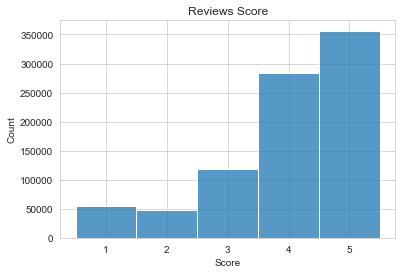

In [6]:
# Plot a histogram of scores by count
sns.set_style('whitegrid')
sns.histplot(data=df_comments, x='Score', discrete=True)
plt.title('Reviews Score')
plt.savefig("reviews_score.png")
plt.show()

In [7]:
# Assign a 0 to scores with value 1 and 2 (negative class), a 1 to scores with value 3 (neutral class) 
# and a 2 to scores with value 4 or 5 (positive class)
df_comments['Sentiment'] = df_comments['Score'].apply(lambda score: 2 if score in (4,5) else (1 if score == 3 else 0))

In [8]:
# Split the DataFrame into the three classes
negative = df_comments[df_comments['Sentiment'] == 0]
neutral = df_comments[df_comments['Sentiment'] == 1]
positive = df_comments[df_comments['Sentiment'] == 2]

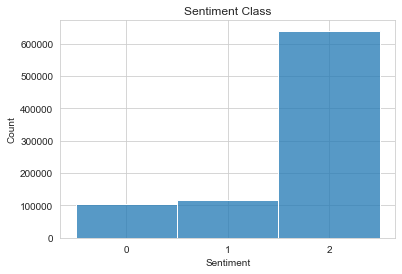

In [9]:
# Plot a histogram of the distribution of scores by class
sns.histplot(data=df_comments, x='Sentiment', discrete=True)
plt.xticks([0, 1, 2])
plt.title('Sentiment Class')
plt.savefig("sentiment_class.png")
plt.show()

In [10]:
# Preprocess the text
# Remove punctuation 
df_comments['Comment'] = df_comments['Comment'].str.replace('[^\w\s]','')
# Convert to lowercase
df_comments['Comment'] = df_comments['Comment'].str.lower()
# Remove stopwords
stop = stopwords.words('spanish')
df_comments['Comment'] = df_comments['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

c:\environments\sentiment_analysis_spacy\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# Split the train and test data
index = df_comments.index
df_comments['random_number'] = np.random.randn(len(index))
train = df_comments[df_comments['random_number'] <= 0.8]
test = df_comments[df_comments['random_number'] > 0.8]

In [12]:
# Convert the text into a bag-of-words model
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

train_matrix = vectorizer.fit_transform(train['Comment'])
test_matrix = vectorizer.transform(test['Comment'])

In [13]:
# Define Multinomial Logistic Regression model
model = LogisticRegression(multi_class='multinomial',solver='newton-cg')

X_train = train_matrix 
X_test = test_matrix 
y_train = train['Sentiment']
y_test = test['Sentiment']

In [14]:
# Fit the model on data and predict
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [15]:
# Testing accuracy
print("Logistic regression model accuracy(in %):", metrics.accuracy_score(y_test, predictions)*100)

Logistic regression model accuracy(in %): 86.02164730728616


In [16]:
# Metrics
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78     20871
           1       0.41      0.57      0.48     18367
           2       0.96      0.91      0.93    142586

    accuracy                           0.86    181824
   macro avg       0.71      0.75      0.73    181824
weighted avg       0.88      0.86      0.87    181824



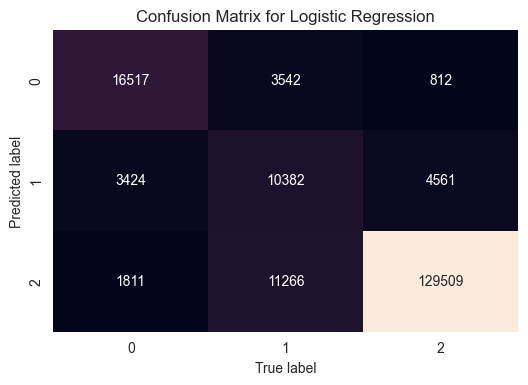

In [17]:
# Confusion matrix
plt.figure(dpi=100)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig("confusion_matrix_LR.png")
plt.show()

In [18]:
# Sample comment set
commentaries = ['1. Buen sitio para tapear con buenos precios, buenas tostas y buen vino y una camarera muy atenta y simpática que te recomienda sitios a los que ir a tapear y a cenar.','2. No se puede fumar, fatal.', '3. Cerveza con sabor a alcantarilla.', '4. Regular.', '5. Ni fu ni fa.', '6. Por la boca vive el pez.']

In [19]:
# Predictions of the sample comment set
for c in range(len(commentaries)):
    pred = model.predict(vectorizer.transform([commentaries[c]]))
    if pred==[0]:
        print(commentaries[c] + "\n--> Negative commentary")
    elif pred==[1]:
        print(commentaries[c] + "\n--> Neutral commentary")
    else:
        print(commentaries[c] + "\n--> Positive commentary")

1. Buen sitio para tapear con buenos precios, buenas tostas y buen vino y una camarera muy atenta y simpática que te recomienda sitios a los que ir a tapear y a cenar.
--> Positive commentary
2. No se puede fumar, fatal.
--> Negative commentary
3. Cerveza con sabor a alcantarilla.
--> Positive commentary
4. Regular.
--> Negative commentary
5. Ni fu ni fa.
--> Neutral commentary
6. Por la boca vive el pez.
--> Positive commentary
